In [1]:
from learningActorCritic import ReinforceAlgorithm
from environmentModel import Model, AdversaryModes
from neuralNetwork import NeuralNetwork
import torch
import torch.nn as nn
from torch.distributions import Categorical

In [2]:
adversaryProbs=torch.zeros(len(AdversaryModes))
adversaryProbs[0]=1/3
adversaryProbs[2]=1/3
adversaryProbs[10]=1/3
game = Model(totalDemand = 400, 
               tupleCosts = (57, 71),
              totalStages = 3, adversaryProbs=adversaryProbs, advHistoryNum=2)
adversaryProbs

tensor([0.3333, 0.0000, 0.3333, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.3333, 0.0000])

In [3]:
game.reset()

(tensor([  0.0000, 200.0000, 128.5000,   0.0000,   0.0000]), 0, False)

In [4]:
game.adversaryChoosePrice()

95

In [5]:
neuralNet=NeuralNetwork(num_input=3+game.advHistoryNum, lr=0.0001,num_actions=4)
algorithm = ReinforceAlgorithm(game, neuralNet, numberIterations=1, numberEpisodes=1000_000, discountFactor =0.9)

--------------------------------------------------
0   adversary:  AdversaryModes.guess_132
  actions:  tensor([2, 1, 0])
loss=  tensor(5.0887, grad_fn=<AddBackward0>)   , actor=  tensor(4.1567, grad_fn=<DivBackward0>)   , critic=  tensor(9.3190, grad_fn=<SumBackward0>)   , return=  15843.2587890625
probs of actions:  tensor([0.2302, 0.2265, 0.2546], grad_fn=<ExpBackward0>)
shouldBreak: False
--------------------------------------------------
10000   adversary:  AdversaryModes.guess_132
  actions:  tensor([2, 2, 2])
loss=  tensor(0.4109, grad_fn=<AddBackward0>)   , actor=  tensor(0.2885, grad_fn=<DivBackward0>)   , critic=  tensor(1.2234, grad_fn=<SumBackward0>)   , return=  15873.1494140625
probs of actions:  tensor([0.2625, 0.2625, 0.2632], grad_fn=<ExpBackward0>)
shouldBreak: False
--------------------------------------------------
20000   adversary:  AdversaryModes.guess_132
  actions:  tensor([3, 0, 2])
loss=  tensor(0.1549, grad_fn=<AddBackward0>)   , actor=  tensor(0.0327, grad_

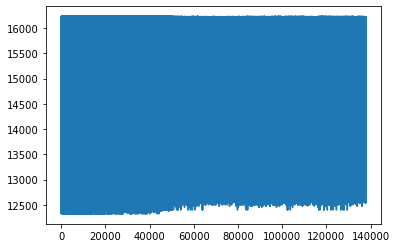

In [6]:
algorithm.solver()

In [7]:
advModeNames=""
for i in range(len(adversaryProbs)):
    if adversaryProbs[i]!=0:
        tmp="{:.1f}".format(adversaryProbs[i])
        advModeNames+=f"{(AdversaryModes(i)).name}-{tmp}-"
    
name=f"ep {algorithm.numberEpisodes}, {advModeNames}, {game.advHistoryNum} hist, {neuralNet.lr} lr"
neuralNet.save(name=name)

In [10]:
import pandas as pd
profits = pd.DataFrame(game.profit).T
prices = pd.DataFrame(game.prices).T
demandPotential = pd.DataFrame(game.demandPotential).T
learning = pd.DataFrame(algorithm.returns[0],columns=['entry'])

<AxesSubplot:>

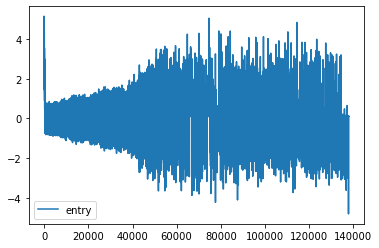

In [11]:
loss = pd.DataFrame(algorithm.loss[0],columns=['entry'])
loss.plot()

,0,1
0,200.0,200.0
1,205.0,195.0
2,207.5,192.5


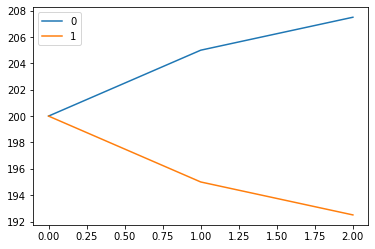

In [12]:
demandPotential.plot()
demandPotential

In [13]:
profits.sum(axis=0)

0    16223.8125
1    11694.8125
dtype: float64

,0,1
0,5103.2500,4160.2500
1,5467.0000,3844.0000
2,5653.5625,3690.5625


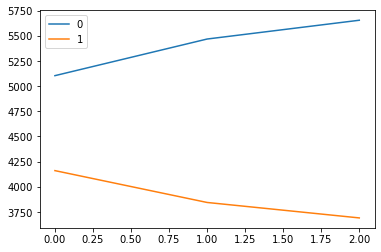

In [14]:
profits.plot()
profits


,0,1
0,125.50,135.50
1,128.00,133.00
2,129.25,131.75


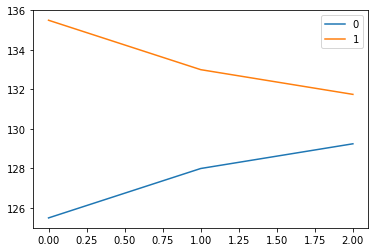

In [15]:
prices.plot()
prices

<AxesSubplot:>

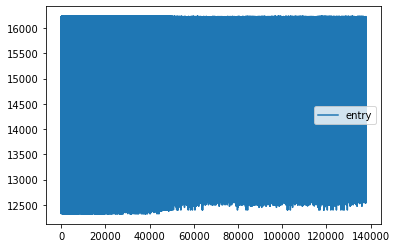

In [16]:
learning.plot()

In [17]:
# pricelearning = pd.DataFrame(game.prices.mean(axis = 0))
# pricelearning.plot()

In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
learning = learning.to_numpy()
learning_2 = [0]*len(learning)
for i in range(len(learning)):
    learning_2[i] = learning[i][0]

In [20]:
avg_learning = np.convolve(learning_2, np.ones(1000)/1000, mode = 'valid')

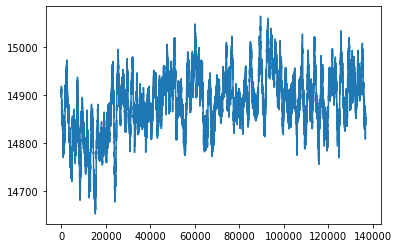

In [21]:
plt.plot(avg_learning)
plt.show()